In [115]:
from strawberryfields.apps import data, sample, subgraph, plot
import plotly
import networkx as nx

# Generate the Random Graph 

In [116]:
def get_clustered_graph():
    import random 
    G = nx.union(nx.union(nx.erdos_renyi_graph(8, 0.85), nx.erdos_renyi_graph(8, 0.85), rename=('G1-', 'G2-')), nx.union(nx.erdos_renyi_graph(8, 0.85), nx.erdos_renyi_graph(8, 0.85), rename=('G3-', 'G4-')))

    nodes = list(G.nodes())

    count = 0
    while count < 10:
        i = random.randint(0, len(nodes)-1)
        j = random.randint(0, len(nodes)-1)

        if i != j and not (nodes[i], nodes[j]) in G.edges:
            G.add_edge(nodes[i], nodes[j])
            count += 1

    # adding random weight to edges:
    for e in G.edges:
        G[e[0]][e[1]]['weight'] = random.random()
        if e[0][:2] != e[1][:2]:
            G[e[0]][e[1]]['weight'] += 1
            G[e[0]][e[1]]['weight'] *= 100

        G[e[0]][e[1]]['inverse_weight'] = 1/G[e[0]][e[1]]['weight']

    return G

    # total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)

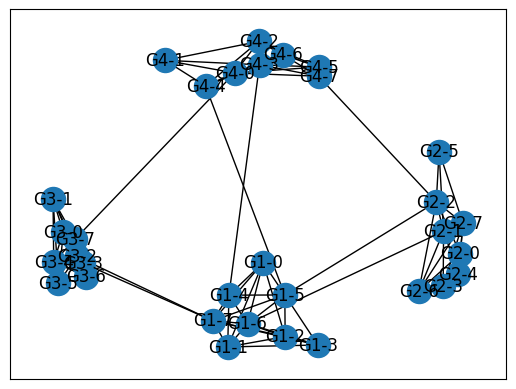

In [121]:
G = get_clustered_graph()
total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)
nx.draw_networkx(G, pos = total_pos)

In [126]:

graph_array = nx.to_numpy_array(G)
samples = sample.sample(graph_array, 3, 10)

/home/harshit/.local/lib/python3.10/site-packages/thewalrus/samples.py:367: ComplexWarning:

Casting complex values to real discards the imaginary part

/home/harshit/.local/lib/python3.10/site-packages/thewalrus/samples.py:370: ComplexWarning:

Casting complex values to real discards the imaginary part



In [127]:
print(len(samples))
print(samples) 

10
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


## Generate the subgraphs from the samples

In [136]:
subgraphs = sample.to_subgraphs(samples, G)
subgraphs = [G.subgraph(graph) if len(graph) > 0 else print('nothing') for graph in subgraphs]

nothing
nothing
nothing
nothing


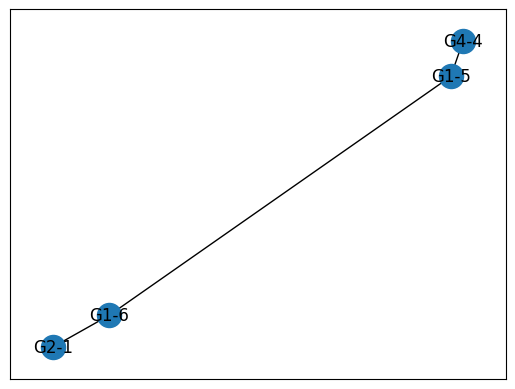

In [138]:
nx.draw_networkx(subgraphs[3])